In [1]:
%load_ext autoreload
%autoreload 2




import numpy as np
from misc import *
import matplotlib.pyplot as plt
from analyze import *

In [2]:
periods, ppp, itraj = 40, 500, 0

In [12]:
histories={}
for k in range(1,8):
    #hist_A, hist_loss, hist_grads
    try:
        histories[k] = load_train_results(periods=periods, ppp=ppp, train_id=k, train_path = "oneparam/")
    except Exception:
        pass

In [13]:
histories.keys()

dict_keys([1, 3, 4, 5, 6, 7])

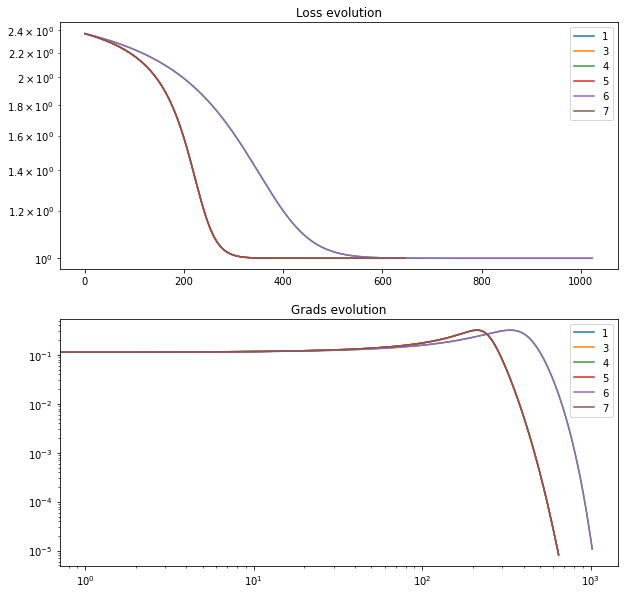

In [14]:
fig_size=(10,10)
fig = plt.figure(figsize=fig_size)

fig = display_histories(fig,histories)


In [53]:
for k in list(histories.keys()):
    print(histories[k][0][-1], "\n")

[[ 0.03681573  6.2880077 ]
 [-6.286709   -0.03430811]] 

[[ 0.03644211  6.314022  ]
 [-6.2602353  -0.03386417]] 

[[ 0.03637801  6.288186  ]
 [-6.2865114  -0.03391273]] 

[[ 0.03276545  6.3172383 ]
 [-6.2563486  -0.03076198]] 

[[-1.3920277   0.88844264]
 [-0.8535715  -1.3802755 ]] 

[[ 0.03367928  6.3165236 ]
 [-6.2573023  -0.03144838]] 

[[-1.0718628  5.7317824]
 [-5.697098  -1.0667776]] 



Text(0, 0.5, 'parameter')

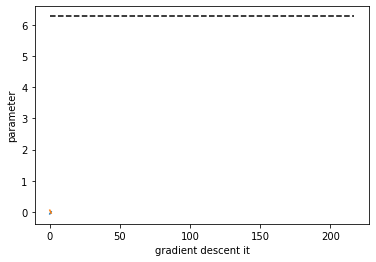

In [43]:
plt.plot(np.squeeze(histories[k][0]))
plt.plot([0,len(histories[k][0])], [np.pi*2]*2,'--', color="black")
plt.xlabel('gradient descent it')
plt.ylabel("parameter")

In [12]:
means, covs, signals, coeffs = load_data(get_def_path()+"{}periods/{}ppp/".format(periods,ppp))

In [10]:
A, dt, C, D = coeffs

In [12]:
A

array([[ 0.       ,  6.2831855],
       [-6.2831855,  0.       ]], dtype=float32)

In [2]:
from tqdm import tqdm 
import numpy as np
from misc import get_def_path
periods = 40
ppp=500

In [9]:
lss=[]
params=[]
for itraj in tqdm(range(1,1000)):
    
    convergence_path = get_def_path()+"{}periods/{}ppp/convergence/{}/".format(periods,ppp, itraj)
    try:

        params.append(np.load(convergence_path+"optimal_parameters.npy"))
        lss.append(np.load(convergence_path+"loss_evolution.npy"))    
    except Exception:
        pass

100%|██████████| 999/999 [00:24<00:00, 40.55it/s] 


In [10]:
cut_series = np.logspace(2,np.log10(ppp*periods),20)

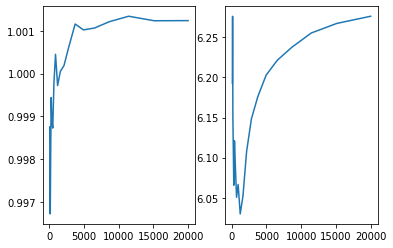

In [11]:
import matplotlib.pyplot as plt 
ax1, ax2 = plt.subplot2grid((1,2),(0,0)), plt.subplot2grid((1,2),(0,1))
ax1.plot(cut_series, np.mean(np.array(lss),axis=0))
ax2.plot(cut_series, np.mean(np.array(params),axis=0))

The gap here should be fisher info right?

Text(0, 0.5, 'std single param')

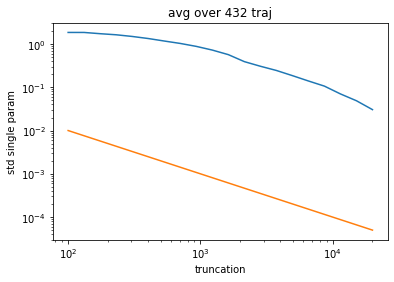

In [8]:
ax=plt.subplot(111)
ax.set_title("avg over {} traj".format(len(params)))
ax.plot(cut_series, np.std(np.array(params),axis=0))
ax.plot(cut_series, 1/cut_series)
ax.set_yscale('log')
ax.set_xscale('log')

ax.set_xlabel("truncation")
ax.set_ylabel("std single param")